In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Replace path if needed
df = pd.read_csv(r"C:\Users\Varun\OneDrive\Desktop\netflix_titles.csv")

# Show top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df.isnull().sum()   #che checkimg if its null 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
df.drop_duplicates(inplace=True)  #Drop duplicates

In [25]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
#converting date to date time format
#run
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
#check
df[['date_added', 'year_added', 'month_added']].head(10)

,date_added,year_added,month_added
0,2021-09-25,2021.0,September
1,2021-09-24,2021.0,September
2,2021-09-24,2021.0,September
3,2021-09-24,2021.0,September
4,2021-09-24,2021.0,September
5,2021-09-24,2021.0,September
6,2021-09-24,2021.0,September
7,2021-09-24,2021.0,September
8,2021-09-24,2021.0,September
9,2021-09-24,2021.0,September


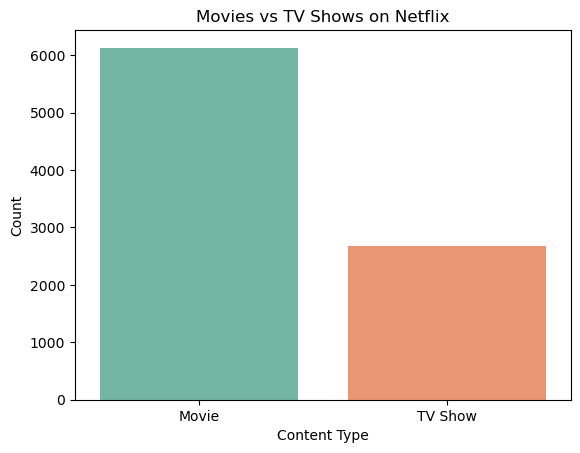

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()
#count pf movie vs tv shows

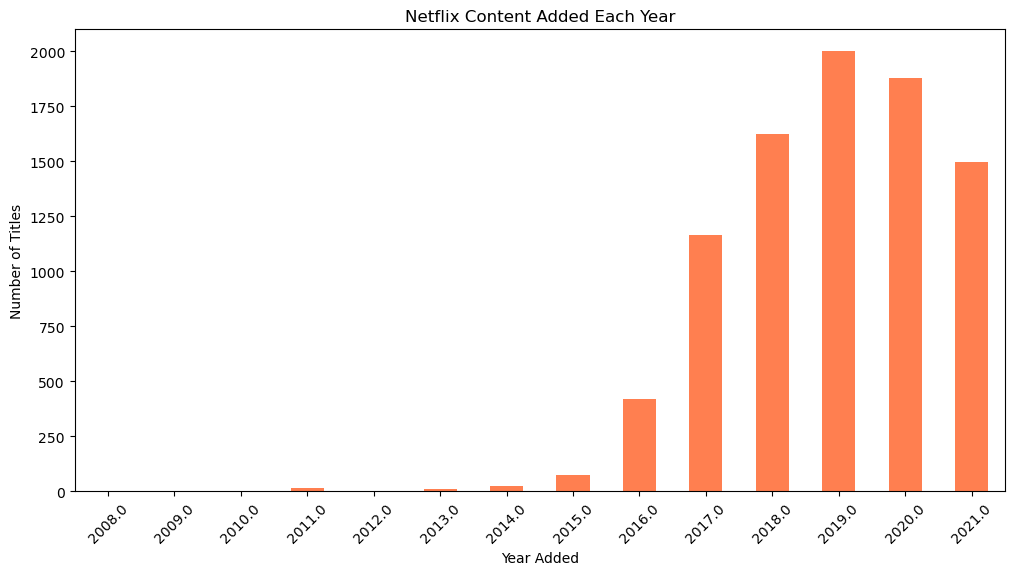

In [31]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='coral')
plt.title('Netflix Content Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
#contet add by the year(trend)

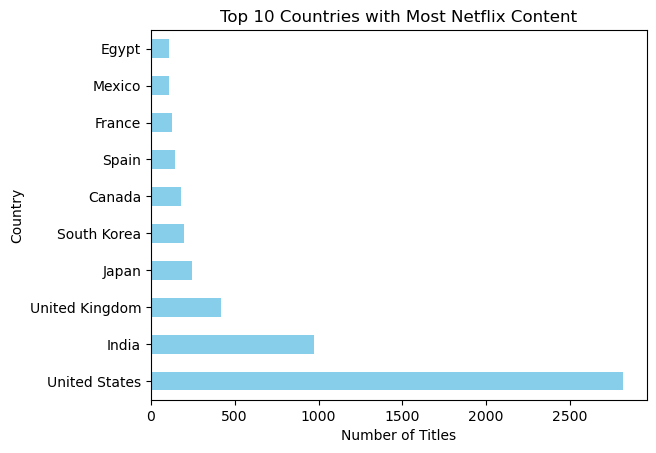

In [33]:
df['country'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
#Top 10 Countries Producing Netflix Content

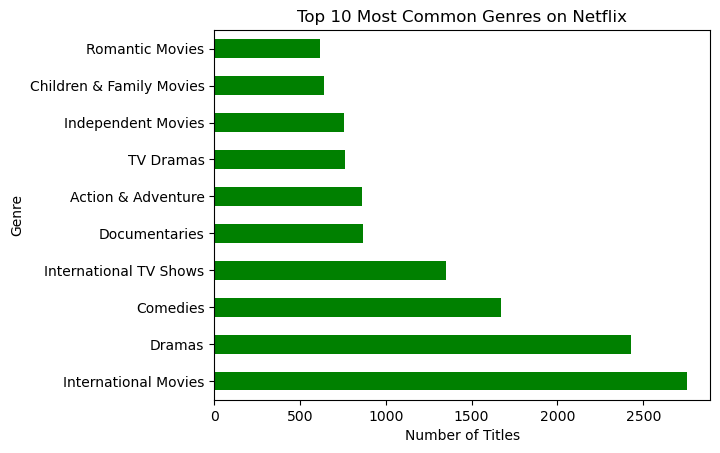

In [35]:
# Split genres and explode into separate rows
genre_data = df['listed_in'].dropna().str.split(', ').explode()

# Plot top 10 genres
genre_data.value_counts().head(10).plot(kind='barh', color='green')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
#Most Common Genres on Netflix